In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = './recording3'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'SuperfluousWords', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '他', '你', '好', '我', '的']


In [3]:
# Settings
feature_sets_path = './recording3ModelTrue/'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = './recording3ModelTrue/TEST.h5'
wake_word = 'SuperfluousWords'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1558, 23, 16)
(191, 23, 16)
(196, 23, 16)


In [7]:
# Peek at labels
print(y_val)

[29. 21. 19. 30.  8. 22. 27. 28.  0. 23. 30. 25. 38. 34. 23. 27. 37. 27.
 21.  4. 37. 17.  2. 39. 39.  2. 22.  3. 16. 22. 27. 20. 37.  3. 37. 12.
 27. 14. 27. 30. 10.  9. 36. 27.  5. 22.  6. 27. 27. 18. 23. 31. 15. 21.
 31.  2. 27. 15.  0. 26. 27.  2. 27. 18.  6. 38.  5. 20. 35. 17. 27. 13.
 27. 13. 20. 36. 17. 30. 27. 17. 11. 27. 27. 11.  7. 33. 23. 15. 27. 15.
 29. 28. 27. 27. 27. 27.  6. 26. 27. 35. 12. 32. 18. 10. 28. 27. 35. 27.
 13.  6. 27. 27. 17. 27. 15. 29. 13.  3.  8. 30. 27. 16. 25. 37. 32.  8.
  9. 27. 37.  7. 27. 23. 27. 27. 27. 33. 35. 27. 23. 24. 21. 27. 27. 24.
 23. 11. 31. 39.  2. 22.  1. 40. 27.  1. 27.  7. 25.  3. 27. 22.  6. 23.
 18. 34. 27. 27. 27. 36. 25. 38.  0. 19. 27. 27. 27.  1. 36. 32. 40. 27.
 15. 35. 27.  0. 22.  5.  3.  9. 27. 27. 15.]


In [8]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
wake_word_index = all_targets.index(wake_word)
y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [9]:
# Peek at labels after conversion
total = 0
print(y_val)
for i in y_val:
    if i == 1:
        total = total + 1
print(total / len(y_val))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]
0.2617801047120419


In [10]:
# What percentage of 'stop' appear in validation labels
print(sum(y_train) / len(y_train))
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.24197689345314505
0.2617801047120419
0.7382198952879582


In [11]:
# View the dimensions of our input data
print(x_train.shape)

(1558, 23, 16)


In [12]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(1558, 23, 16, 1)
(191, 23, 16, 1)
(196, 23, 16, 1)


In [13]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(23, 16, 1)


In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.05))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.05))
model.add(layers.Dense(1, activation='sigmoid'))
# Display model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 7, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 6, 64)         8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 2, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 1, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 1, 128)         0

In [15]:
# Add training parameters to model
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [16]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=20, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Epoch 1/20
32/32 [==============================] - 8s 24ms/step - loss: 0.5186 - acc: 0.7625 - val_loss: 0.5663 - val_acc: 0.7435
Epoch 2/20
32/32 [==============================] - 0s 12ms/step - loss: 0.4282 - acc: 0.8126 - val_loss: 0.5252 - val_acc: 0.7749
Epoch 3/20
32/32 [==============================] - 0s 12ms/step - loss: 0.3578 - acc: 0.8472 - val_loss: 0.5984 - val_acc: 0.7749
Epoch 4/20
32/32 [==============================] - 0s 11ms/step - loss: 0.3348 - acc: 0.8697 - val_loss: 0.3743 - val_acc: 0.8482
Epoch 5/20
32/32 [==============================] - 0s 11ms/step - loss: 0.3099 - acc: 0.8761 - val_loss: 0.3467 - val_acc: 0.8586
Epoch 6/20
32/32 [==============================] - 0s 12ms/step - loss: 0.2474 - acc: 0.9037 - val_loss: 0.2997 - val_acc: 0.8691
Epoch 7/20
32/32 [==============================] - 0s 11ms/step - loss: 0.2227 - acc: 0.9108 - val_loss: 0.4984 - val_acc: 0.8377
Epoch 8/20
32/32 [==============================] - 0s 11ms/step - loss: 0.2023 - a

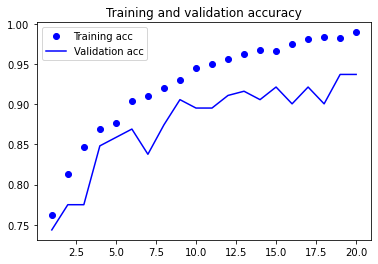

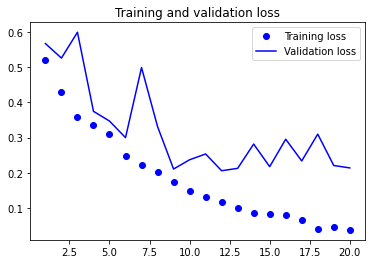

In [17]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
# Save the model as a file
models.save_model(model, model_filename)

In [19]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

0
3
8
16
23
29
30
31
37
42
46
57
58
61
68
69
72
73
74
84
88
91
96
97
100
103
108
114
115
121
122
123
128
135
137
140
141
144
154
158
159
160
162
163
172
173
175
176
177
179
183
188
194


In [20]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(0, 50):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 1.0  Prediction: [[0.9757461]]
Answer: 0.0  Prediction: [[0.00875952]]
Answer: 0.0  Prediction: [[0.20513918]]
Answer: 1.0  Prediction: [[0.9993362]]
Answer: 0.0  Prediction: [[0.6928968]]
Answer: 0.0  Prediction: [[4.1458014e-05]]
Answer: 0.0  Prediction: [[4.7969465e-06]]
Answer: 0.0  Prediction: [[0.06196257]]
Answer: 1.0  Prediction: [[0.9999864]]
Answer: 0.0  Prediction: [[0.00017925]]
Answer: 0.0  Prediction: [[1.2251783e-06]]
Answer: 0.0  Prediction: [[0.10988265]]
Answer: 0.0  Prediction: [[5.4584903e-05]]
Answer: 0.0  Prediction: [[0.5758214]]
Answer: 0.0  Prediction: [[0.5240858]]
Answer: 0.0  Prediction: [[0.00237305]]
Answer: 1.0  Prediction: [[0.99455416]]
Answer: 0.0  Prediction: [[0.01441507]]
Answer: 0.0  Prediction: [[1.2262677e-06]]
Answer: 0.0  Prediction: [[3.4050852e-05]]
Answer: 0.0  Prediction: [[2.0385629e-07]]
Answer: 0.0  Prediction: [[0.07773568]]
Answer: 0.0  Prediction: [[0.00089942]]
Answer: 1.0  Prediction: [[0.9995517]]
Answer: 0.0  Prediction: [

In [21]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

7/7 [==============================] - 0s 14ms/step - loss: 0.2706 - acc: 0.8929


[0.2705719470977783, 0.8928571343421936]